# Libraries and packages

Cargamos las librerías necesarias para la ejecución del proyecto. Dividimos en librerías básicas y de graficado, NLP y ML.
%%capture es para no ver el resultado tras ejecutar la celda

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%%capture
#Conventional libraries
import plotly.express as px

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
#NLP
import re
import string
from string import digits
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
#Sklearn
import pickle
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import itertools
#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Functions

Se define la función que limpia los tweets así como las stopwords, es decir, las palabras más frecuentes

In [5]:
# Functions

def transform(text):
  stopwords = nltk.corpus.stopwords.words('spanish')
  stopwords.extend(["El", "Él", "el", "la", "los", "La", "Los", 
                  "hashtag", "si", "sí", "Sí", "dtype", "Index", "length", 
                  "object", "user", "...", "..", "¡", '``', "_", "°C", '___'])
  text = str(text)
  text = text.lower()
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text) #Remover menciones @
  text = re.sub(r'RT[|\s]', ' ', text) # Remover RTs
  text = re.sub(r'#', ' ', text) #Remover # en el tweet
  text = re.sub(r'https?:\/\/\S+', ' ', text) #Remover links

  #Nuevas incluidas remove links
  text = re.sub(r'http\S+', ' ', text) # remove http links
  text = re.sub(r'bit.ly/\S+', ' ', text) # remove http links
  text = re.sub(r'pic.twitter\S+', ' ', text) # remove links
  text = text.strip('[link]') # remove links

  #Remove hashtags """Takes a string and removes any hash tags"""
  text = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', text)  # remove hash tags
  text = re.sub('HASHTAG', '', text)  # remove hash tags)
  text = re.sub('USER', '', text)  # remove hash tags)


  pattern = r'''(?x)                    # set flag to allow verbose regexps
              (?:[A-Z]\.)+            # abbreviations, e.g. U.S.A
              | \w+(?:-\w+)*          # Words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%?    # Currency and precentages, e.g. $12.40 82%
              | \.\.\.                # Ellipsis
              | [][.,;"'?():-_`]      #These are separate tokens; includes ],[
              '''
  words = nltk.regexp_tokenize(text, pattern)
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # Remover signos de puntuacion
  stripped = [re_punc.sub('', w) for w in words]
  no_garbage = [w for w in stripped if  w.lower() not in stopwords] # Remover stopwords

  return (" ".join(no_garbage))
def tokenization(text):
  text = word_tokenize(text.lower())
  return text
  
SS = SnowballStemmer('spanish')
def stemmer(text):
  text = [SS.stem(word) for word in text]
  return text

# Data cleaning

## Loading data

Cargamos la base de datos que hemos creado con la valoración algorítmica de los tweets relacionados con Aragón :ok

In [6]:
tw = pd.read_csv("/content/drive/MyDrive/HaPyness/para_valorar_Fernando.csv")
tw

,Unnamed: 0,Texto_tweet,Geo,Fecha
0,0,@Almudena_Sopena Se han lucrado del Zaragoza d...,"Zaragoza, España",2019-07-28 01:06:51
1,1,@lal_aragon Buenos!!,Madrid,2010-10-15 07:58:58
2,2,@mendezLopezg1 Cómo agua.... T___T)) ya sabía ...,NaN,2010-11-18 04:40:57
3,3,@J_Zaragoza_ No cómo hizo el psoe en Andalucía...,"Madrid, España",2020-05-01 21:07:21
4,4,@Diablo_Heraldo @Cruyffero No me convence tamp...,NaN,2020-07-26 00:05:33
...,...,...,...,...
1995,1995,Personal Laboral AGE: CONFLICTO COLECTIVO POR ...,"Zaragoza, España",2014-05-27 05:58:33
1996,1996,@J_Zaragoza_ Tan bien como al peeseoe,"Comunidad de Madrid, España",2016-03-24 18:58:34
1997,1997,@vlc_JI @BEsquiliche @sabina66801497 @POZI1972...,Barcelona,2015-03-23 18:40:15
1998,1998,"@MBlanquillo1932 @CopeZaragoza Eso si, cualqui...","Zaragoza, España",2010-06-20 18:17:24


##Limpieza y procesado
Se limpia el tweet y se generan las siguientes columnas.
1. Texto limpio
2. Texto como lista
3. Añadimos la fecha del tweet
4. Texto con el filtro stem
4. Texto con el filtro stem en lista

El texto en forma de lista es bastante interesante para procesar luego el texto

In [7]:
df1 = pd.read_csv("/content/drive/MyDrive/HaPyness/para_valorar_Fernando OUT_es.csv", 
                  encoding = "UTF8",
                  delimiter = ";")
df2 = df1.drop(['Unnamed: 0',	'ID'], axis = 1)
df2['Texto_tweet'] = df2['Texto_tweet'].apply(transform)
df2['list'] = df2['Texto_tweet'].apply(tokenization)
df2['Fecha'] = tw['Fecha']
df2['stemmed'] = df2['list'].apply(stemmer)
df2['stemmed_str'] = df2['stemmed'].apply(lambda x: ' '.join(x))

In [8]:
df2

,texto_tweet_original,valoracion_corpus,Texto_tweet,valoracion_calculada,list,Fecha,stemmed,stemmed_str
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,"[sopena, lucrado, zaragoza, primer, minuto, av...",2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
1,@lal_aragon Buenos!!,0,aragon buenos,1.0,"[aragon, buenos]",2010-10-15 07:58:58,"[aragon, buen]",aragon buen
2,@mendezLopezg1 Cómo agua.... T___T)) ya sabía ...,0,cómo agua tt sabía pasaba aquí viendo hechen,0.0,"[cómo, agua, tt, sabía, pasaba, aquí, viendo, ...",2010-11-18 04:40:57,"[com, agu, tt, sab, pas, aqu, viend, hech]",com agu tt sab pas aqu viend hech
3,@J_Zaragoza_ No cómo hizo el psoe en Andalucía...,0,zaragoza cómo hizo psoe andalucía,0.0,"[zaragoza, cómo, hizo, psoe, andalucía]",2020-05-01 21:07:21,"[zaragoz, com, hiz, pso, andaluc]",zaragoz com hiz pso andaluc
4,@Diablo_Heraldo @Cruyffero No me convence tamp...,0,heraldo convence tampoco mejor mingueza,1.0,"[heraldo, convence, tampoco, mejor, mingueza]",2020-07-26 00:05:33,"[herald, convenc, tampoc, mejor, minguez]",herald convenc tampoc mejor minguez
...,...,...,...,...,...,...,...,...
2227,@J_Zaragoza_ Tan bien como al peeseoe,0,zaragoza tan bien peeseoe,1.0,"[zaragoza, tan, bien, peeseoe]",NaN,"[zaragoz, tan, bien, peeseo]",zaragoz tan bien peeseo
2228,@vlc_JI @BEsquiliche @sabina66801497 @POZI1972...,0,ji lustre saez,0.0,"[ji, lustre, saez]",NaN,"[ji, lustr, saez]",ji lustr saez
2229,"@MBlanquillo1932 @CopeZaragoza Eso si, cualqui...",0,cualquier tipo amenaza insulto totalmente repr...,-1.0,"[cualquier, tipo, amenaza, insulto, totalmente...",NaN,"[cualqui, tip, amenaz, insult, total, reprob]",cualqui tip amenaz insult total reprob
2230,"Zaragoza, España",0,zaragoza españa,0.0,"[zaragoza, españa]",NaN,"[zaragoz, españ]",zaragoz españ


# Exploratory analysis

La función explode nos permite ordenar las listas y pivotarlas en filas del dataframe. De este modo cada palabra de una lista da una fila.


In [9]:
df3 = df2.explode("list")
df3

,texto_tweet_original,valoracion_corpus,Texto_tweet,valoracion_calculada,list,Fecha,stemmed,stemmed_str
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,sopena,2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,lucrado,2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,zaragoza,2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,primer,2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,minuto,2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
...,...,...,...,...,...,...,...,...
2230,"Zaragoza, España",0,zaragoza españa,0.0,zaragoza,NaN,"[zaragoz, españ]",zaragoz españ
2230,"Zaragoza, España",0,zaragoza españa,0.0,españa,NaN,"[zaragoz, españ]",zaragoz españ
2231,@sabina66801497 @POZI1972 @DanielRodOrd @Ctzen...,0,ji lustre saez,0.0,ji,NaN,"[ji, lustr, saez]",ji lustr saez
2231,@sabina66801497 @POZI1972 @DanielRodOrd @Ctzen...,0,ji lustre saez,0.0,lustre,NaN,"[ji, lustr, saez]",ji lustr saez


Las palabras más usadas, en frecuencia

In [10]:
b = pd.DataFrame(df3['list'].value_counts().sort_values(ascending = False))
b = b.reset_index()
b.columns = ["Word", "Cuentas"]
b

,Word,Cuentas
0,zaragoza,476
1,ji,245
2,lustre,214
3,heraldo,151
4,aragón,148
...,...,...
5636,compartimos,1
5637,madridf,1
5638,curarte,1
5639,ultraderecha,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

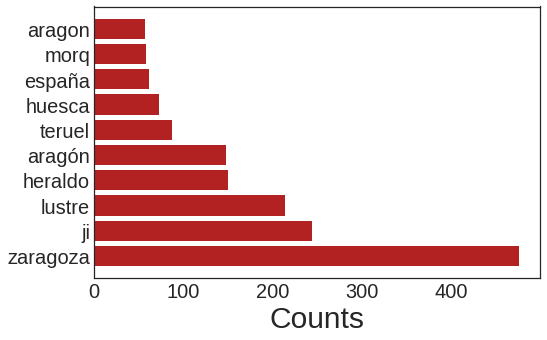

In [11]:
plt.figure(figsize = (8,5))
plt.style.use('seaborn-white')
plt.barh(b['Word'].head(10),b['Cuentas'].head(10), color = "firebrick")
plt.xlabel("Counts", fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Figure

Quitamos las que tienen una valoración neutra. Nuestro objetivo es predecir felicidad o tristeza

In [12]:
df4 = df2.copy()

In [13]:
df4 = df4[df4['valoracion_calculada'] != 0]
df4

,texto_tweet_original,valoracion_corpus,Texto_tweet,valoracion_calculada,list,Fecha,stemmed,stemmed_str
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,"[sopena, lucrado, zaragoza, primer, minuto, av...",2019-07-28 01:06:51,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...
1,@lal_aragon Buenos!!,0,aragon buenos,1.0,"[aragon, buenos]",2010-10-15 07:58:58,"[aragon, buen]",aragon buen
4,@Diablo_Heraldo @Cruyffero No me convence tamp...,0,heraldo convence tampoco mejor mingueza,1.0,"[heraldo, convence, tampoco, mejor, mingueza]",2020-07-26 00:05:33,"[herald, convenc, tampoc, mejor, minguez]",herald convenc tampoc mejor minguez
6,"@lal_aragon Buenos días cielo, ya me voy. Fel...",0,aragon buenos días cielo voy feliz día,1.0,"[aragon, buenos, días, cielo, voy, feliz, día]",2014-10-23 13:21:01,"[aragon, buen, dias, ciel, voy, feliz, dia]",aragon buen dias ciel voy feliz dia
7,#Salud| Mañana las cabinas de tamizaje Covid-1...,0,salud mañana cabinas tamizaje covid19 llegarán...,1.0,"[salud, mañana, cabinas, tamizaje, covid19, ll...",2009-11-05 17:46:11,"[salud, mañan, cabin, tamizaj, covid19, lleg, ...",salud mañan cabin tamizaj covid19 lleg municip...
...,...,...,...,...,...,...,...,...
2220,La sala de conciertos 'El Veintiuno' lleva en ...,0,sala conciertos veintiuno lleva activo nueve a...,1.0,"[sala, conciertos, veintiuno, lleva, activo, n...",NaN,"[sal, conciert, veintiun, llev, activ, nuev, a...",sal conciert veintiun llev activ nuev años cua...
2223,#Nacionales | Pandilleros que extorsionaban en...,0,acionales pandilleros extorsionaban zaragoza e...,-1.0,"[acionales, pandilleros, extorsionaban, zarago...",NaN,"[acional, pandiller, extorsion, zaragoz, enfre...",acional pandiller extorsion zaragoz enfrent vi...
2226,Personal Laboral AGE: CONFLICTO COLECTIVO POR ...,0,personal laboral age conflicto colectivo incum...,-1.0,"[personal, laboral, age, conflicto, colectivo,...",NaN,"[personal, laboral, age, conflict, colect, inc...",personal laboral age conflict colect incumpl a...
2227,@J_Zaragoza_ Tan bien como al peeseoe,0,zaragoza tan bien peeseoe,1.0,"[zaragoza, tan, bien, peeseoe]",NaN,"[zaragoz, tan, bien, peeseo]",zaragoz tan bien peeseo


Se crea un dataframe con los tweets que presentan fecha y se convierte a año-mes-día.

In [14]:
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(how = "any").reset_index(drop = True)
df4['Fecha'] = pd.to_datetime(df4['Fecha']).dt.strftime('%Y-%m-%d')
df4['Covid'] = np.where(df4['Fecha']<"2019-03", "PreCovid", "Covid")
df4

,texto_tweet_original,valoracion_corpus,Texto_tweet,valoracion_calculada,list,Fecha,stemmed,stemmed_str,Covid
0,@Almudena_Sopena Se han lucrado del Zaragoza d...,0,sopena lucrado zaragoza primer minuto avalista...,1.0,"[sopena, lucrado, zaragoza, primer, minuto, av...",2019-07-28,"[sopen, lucr, zaragoz, prim, minut, aval, inte...",sopen lucr zaragoz prim minut aval interes pre...,Covid
1,@lal_aragon Buenos!!,0,aragon buenos,1.0,"[aragon, buenos]",2010-10-15,"[aragon, buen]",aragon buen,PreCovid
2,@Diablo_Heraldo @Cruyffero No me convence tamp...,0,heraldo convence tampoco mejor mingueza,1.0,"[heraldo, convence, tampoco, mejor, mingueza]",2020-07-26,"[herald, convenc, tampoc, mejor, minguez]",herald convenc tampoc mejor minguez,Covid
3,"@lal_aragon Buenos días cielo, ya me voy. Fel...",0,aragon buenos días cielo voy feliz día,1.0,"[aragon, buenos, días, cielo, voy, feliz, día]",2014-10-23,"[aragon, buen, dias, ciel, voy, feliz, dia]",aragon buen dias ciel voy feliz dia,PreCovid
4,#Salud| Mañana las cabinas de tamizaje Covid-1...,0,salud mañana cabinas tamizaje covid19 llegarán...,1.0,"[salud, mañana, cabinas, tamizaje, covid19, ll...",2009-11-05,"[salud, mañan, cabin, tamizaj, covid19, lleg, ...",salud mañan cabin tamizaj covid19 lleg municip...,PreCovid
...,...,...,...,...,...,...,...,...,...
620,Policía detecta unos 40 miembros https://t.co/...,0,policía detecta 40 miembros activos robos viol...,-1.0,"[policía, detecta, 40, miembros, activos, robo...",2022-02-16,"[polic, detect, 40, miembr, activ, rob, violen...",polic detect 40 miembr activ rob violenci lesion,Covid
621,⚠️ Sin cambios por el momento en el frente de ...,0,cambios momento frente teruel,1.0,"[cambios, momento, frente, teruel]",2011-05-07,"[cambi, moment, frent, teruel]",cambi moment frent teruel,PreCovid
622,#artes : Eva Armisén en Zaragoza. Bondad artís...,0,artes eva armisén zaragoza bondad artística al...,1.0,"[artes, eva, armisén, zaragoza, bondad, artíst...",2010-04-27,"[artes, eva, armisen, zaragoz, bond, artist, a...",artes eva armisen zaragoz bond artist alegr,PreCovid
623,La DGA espera captar unos 40 millones pero los...,0,dga espera captar 40 millones ayuntamientos pr...,1.0,"[dga, espera, captar, 40, millones, ayuntamien...",2020-04-16,"[dga, esper, capt, 40, millon, ayunt, proyect,...",dga esper capt 40 millon ayunt proyect valor 1...,Covid


Se convierte la fecha a año y se cuentan los tweets en cada año, tanto positivos como negativos.
Por último se grafican los resultados, la evolución temporal

In [15]:
df5 = df4[['Fecha', 'valoracion_calculada', 'Covid']].sort_values(by ='Fecha').reset_index(drop = True)
df5['Fecha'] = pd.to_datetime(df5['Fecha']).dt.strftime('%Y')


In [16]:
df5.value_counts()

Fecha  valoracion_calculada  Covid   
2021   -1.0                  Covid       64
        1.0                  Covid       51
2020   -1.0                  Covid       35
2010    1.0                  PreCovid    34
       -1.0                  PreCovid    31
2011   -1.0                  PreCovid    30
        1.0                  PreCovid    29
2020    1.0                  Covid       28
2012   -1.0                  PreCovid    23
2015   -1.0                  PreCovid    21
2017   -1.0                  PreCovid    19
2019   -1.0                  Covid       19
2017    1.0                  PreCovid    19
2014    1.0                  PreCovid    17
2019    1.0                  Covid       16
2009    1.0                  PreCovid    16
2016    1.0                  PreCovid    16
2009   -1.0                  PreCovid    16
2018   -1.0                  PreCovid    14
2015    1.0                  PreCovid    13
2018    1.0                  PreCovid    12
2022    1.0                  Covid    

[Text(0, 0.5, 'Número de tweets'), Text(0.5, 0, '')]

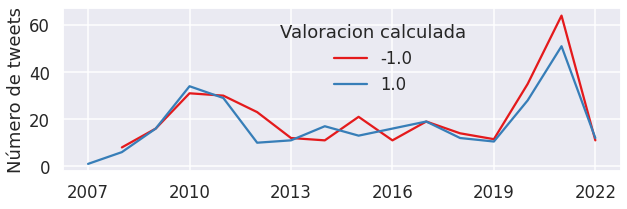

In [17]:
df6 = pd.DataFrame(df5.value_counts()).reset_index()
df6 = df6.sort_values(by ='Fecha')
df6.columns = ['Fecha', 'valoracion_calculada', 'Covid', 'Numero_Tweets']
plt.figure(figsize =(10,3))
sns.set_theme(context = 'talk')
a = sns.lineplot(data = df6, x = 'Fecha', y = 'Numero_Tweets', hue = 'valoracion_calculada', 
                 ci = 0.95,palette = 'Set1')
plt.setp(a, xticks = ('2007','2010', '2013','2016','2019', '2022'))
sns.move_legend(a, "upper right", bbox_to_anchor=(.75, 1), title='Valoracion calculada', frameon = False)
a.set(ylabel = 'Número de tweets', xlabel = '')

In [18]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(x=df6['Fecha'], y=df6['Numero_Tweets'], color = df6['valoracion_calculada'],
              labels={
                     "y": "Número de tweets",
                     "x": "",
                     "color": "Valoración calculada"
                 },)

fig.show()

[Text(0, 0.5, ''), Text(0.5, 0, '')]

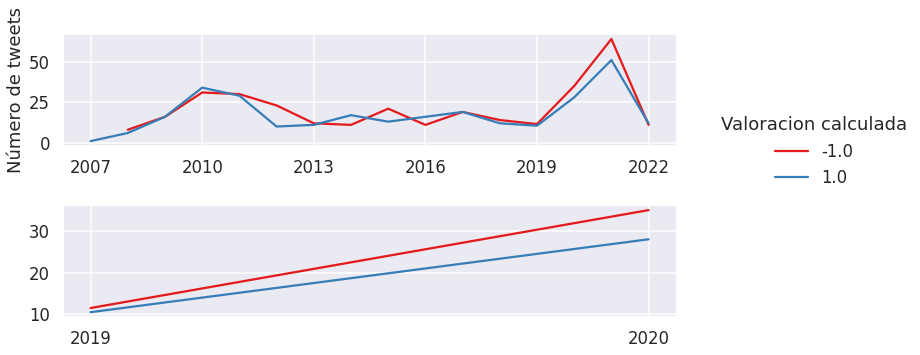

In [19]:
zoom = ('2019','2020')
fig = plt.figure(figsize=(11, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)
main_ax = fig.add_subplot(grid[1:4, :])
zoom_ax = fig.add_subplot(grid[5:, :])
sns.lineplot(data = df6, x = 'Fecha', y = 'Numero_Tweets', hue = 'valoracion_calculada', 
                 ci = 0.95,palette = 'Set1', ax = main_ax)
plt.setp(main_ax, xticks = ('2007','2010', '2013','2016','2019', '2022'))
sns.move_legend(main_ax, "upper right", bbox_to_anchor=(1.4, .4), title='Valoracion calculada', frameon = False)
main_ax.set(ylabel = 'Número de tweets', xlabel = '')

sns.lineplot(data = df6[df6['Fecha'].isin(zoom)], x = 'Fecha', y = 'Numero_Tweets', hue = 'valoracion_calculada', 
                 ci = 0.95,palette = 'Set1', ax = zoom_ax, legend = False)
zoom_ax.set(ylabel = '', xlabel = '')

# ML

Procesado para convertir los datos en una estructura para ML

## Data preparation

In [20]:
ml = df2[["Texto_tweet","valoracion_corpus", 'valoracion_calculada']]
ml2 = ml[ml['valoracion_calculada'] != 0].reset_index(drop = True)
ml2

,Texto_tweet,valoracion_corpus,valoracion_calculada
0,sopena lucrado zaragoza primer minuto avalista...,0,1.0
1,aragon buenos,0,1.0
2,heraldo convence tampoco mejor mingueza,0,1.0
3,aragon buenos días cielo voy feliz día,0,1.0
4,salud mañana cabinas tamizaje covid19 llegarán...,0,1.0
...,...,...,...
683,sala conciertos veintiuno lleva activo nueve a...,0,1.0
684,acionales pandilleros extorsionaban zaragoza e...,0,-1.0
685,personal laboral age conflicto colectivo incum...,0,-1.0
686,zaragoza tan bien peeseoe,0,1.0


Nuestras variables son las palabras, luego mediante TFIDF convertimos el *tweet limpio* en un *bag of words*.

In [21]:
X = ml2['Texto_tweet']
X

0      sopena lucrado zaragoza primer minuto avalista...
1                                          aragon buenos
2                heraldo convence tampoco mejor mingueza
3                 aragon buenos días cielo voy feliz día
4      salud mañana cabinas tamizaje covid19 llegarán...
                             ...                        
683    sala conciertos veintiuno lleva activo nueve a...
684    acionales pandilleros extorsionaban zaragoza e...
685    personal laboral age conflicto colectivo incum...
686                            zaragoza tan bien peeseoe
687    cualquier tipo amenaza insulto totalmente repr...
Name: Texto_tweet, Length: 688, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidfvectorizer = TfidfVectorizer()
tfidf_wm = tfidfvectorizer.fit_transform(X)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

ml3 = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
ml4 = pd.concat((ml2[["valoracion_corpus", 'valoracion_calculada']], ml3), axis = 1)
ml4

,valoracion_corpus,valoracion_calculada,00,000,02,07,10,100,10h,11,12,120,13,14,15,157,16,17,18,19,1908,1985,1988,19º,1a,20,200,2013,2014,2020,2022,22,25,251god,27,2da,30,300,31,33,...,wow,ws,wtc,xa,xd,xi,xit,xogador,yarza,yendo,you,ypadre,ysq,zagales,zanjáis,zarag,zaragoza,zaragozano,zgz,ziquilink,zl,zo,zonas,zurda,álvarez,ánimo,ánimos,ár,árbitro,área,ástima,élite,éxito,órganos,últimahora,últimas,últimos,única,𝗔𝘇𝘁𝗲𝗰𝗮,𝗨𝗡𝗢
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684,0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319929,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Valoracion Fernando

Se usa como etiqueta el valor predecido por el algoritmo automático. 
Se prueban diferentes modelos de ML con parámetros básicos.

In [54]:
ml5 = ml4.copy()
datos_X = ml5.drop(["valoracion_corpus",	"valoracion_calculada"], axis = 1)
datos_y = ml5['valoracion_calculada']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(datos_X,datos_y,test_size = 0.2,random_state = 123)


In [25]:
modelRF = RandomForestClassifier(random_state = 123) #valores por defecto
modelRF = modelRF.fit(X_train, y_train)
modelRF

RandomForestClassifier(random_state=123)

In [26]:
#EVALUATION
prediction_rf = modelRF.predict(X_test)
conf_rf       = confusion_matrix(y_test, prediction_rf)
acc_rf        = accuracy_score(y_test, prediction_rf)
prec_rf       = precision_score(y_test, prediction_rf, average="weighted")
rec_rf        = recall_score(y_test, prediction_rf, average="weighted")
f1_rf         = f1_score(y_test, prediction_rf, average="weighted")

print("Confusion Matrix: \n", conf_rf, '\n')
print("Accuracy    : ", acc_rf)
print("Recall      : ", prec_rf)
print("Precision   : ", rec_rf)
print("F1 Score    : ", f1_rf)

Confusion Matrix: 
 [[61  2]
 [48 27]] 

Accuracy    :  0.6376811594202898
Recall      :  0.7614816444988515
Precision   :  0.6376811594202898
F1 Score    :  0.6060025666951854


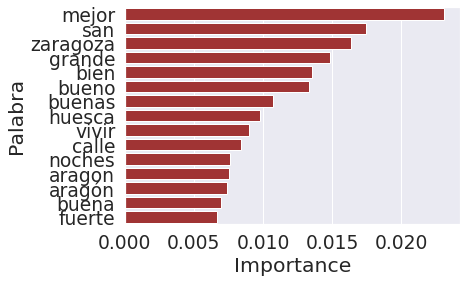

In [27]:
importance = pd.DataFrame(modelRF.feature_importances_, columns = ["Importance"])
palabras = pd.DataFrame(list(datos_X.columns), columns = ["Palabra"])
fer1 = pd.concat((palabras,importance), axis = 1)
fer2 = fer1.sort_values(by = 'Importance', ascending = False).reset_index(drop = True).head(15)
sns.set_context("notebook", font_scale = 1.7)
g = sns.barplot(data = fer2, y = "Palabra", x = "Importance", color = "firebrick")

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 30, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [58]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [59]:
modelRF = RandomForestClassifier(
                                 bootstrap = False,
                                 max_depth = 70,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 2,
                                 min_samples_split = 10,
                                 n_estimators = 1200,
                                 random_state = 123
                                 ) #valores por defecto
modelRF = modelRF.fit(X_train, y_train)
modelRF

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1200, random_state=123)

In [60]:
#EVALUATION
prediction_rf = modelRF.predict(X_test)
conf_rf       = confusion_matrix(y_test, prediction_rf)
acc_rf        = accuracy_score(y_test, prediction_rf)
prec_rf       = precision_score(y_test, prediction_rf, average="weighted")
rec_rf        = recall_score(y_test, prediction_rf, average="weighted")
f1_rf         = f1_score(y_test, prediction_rf, average="weighted")

print("Confusion Matrix: \n", conf_rf, '\n')
print("Accuracy    : ", acc_rf)
print("Recall      : ", prec_rf)
print("Precision   : ", rec_rf)
print("F1 Score    : ", f1_rf)

Confusion Matrix: 
 [[56  7]
 [39 36]] 

Accuracy    :  0.6666666666666666
Recall      :  0.7241126070991433
Precision   :  0.6666666666666666
F1 Score    :  0.6552242008152757


## SVM

In [29]:
from sklearn import svm
modelSVM=svm.SVC(random_state = 1) #valores por defecto
modelSVM = modelSVM.fit(X_train, y_train)
modelSVM

SVC(random_state=1)

In [30]:
prediction_svm = modelSVM.predict(X_test)
conf_svm       = confusion_matrix(y_test, prediction_svm)
acc_svm        = accuracy_score(y_test, prediction_svm)
prec_svm       = precision_score(y_test, prediction_svm, average="weighted")
rec_svm        = recall_score(y_test, prediction_svm, average="weighted")
f1_svm         = f1_score(y_test, prediction_svm, average="weighted")

print("Confusion Matrix: \n", conf_svm, '\n')
print("Accuracy    : ", acc_svm)
print("Recall      : ", prec_svm)
print("Precision   : ", rec_svm)
print("F1 Score    : ", f1_svm)

Confusion Matrix: 
 [[61  2]
 [49 26]] 

Accuracy    :  0.6304347826086957
Recall      :  0.7578204404291361
Precision   :  0.6304347826086957
F1 Score    :  0.5963175603959623


## XGBoost

In [31]:
from xgboost import XGBClassifier
modelXGB=XGBClassifier() #valores por defecto
modelXGB = modelXGB.fit(X_train, y_train)
modelXGB

XGBClassifier()

In [32]:
prediction_xgb = modelXGB.predict(X_test)
conf_xgb      = confusion_matrix(y_test, prediction_xgb)
acc_xgb       = accuracy_score(y_test, prediction_xgb)
prec_xgb       = precision_score(y_test, prediction_xgb, average="weighted")
rec_xgb        = recall_score(y_test, prediction_xgb, average="weighted")
f1_xgb        = f1_score(y_test, prediction_xgb, average="weighted")

print("Confusion Matrix: \n", conf_xgb, '\n')
print("Accuracy    : ", acc_xgb)
print("Recall      : ", prec_xgb)
print("Precision   : ", rec_xgb)
print("F1 Score    : ", f1_xgb)

Confusion Matrix: 
 [[57  6]
 [51 24]] 

Accuracy    :  0.5869565217391305
Recall      :  0.6757246376811594
Precision   :  0.5869565217391305
F1 Score    :  0.5527950310559006


In [33]:
rf = pd.DataFrame({"Parameter":["Accuracy", "Recall", "Precision", "F1_score"], 
                    "Value":[acc_rf, prec_rf, rec_rf, f1_rf]})
rf["Model"] = "rf"
xgb = pd.DataFrame({"Parameter":["Accuracy", "Recall", "Precision", "F1_score"], 
                    "Value":[acc_xgb, prec_xgb, rec_xgb, f1_xgb]})
xgb["Model"] = "xgb"
svm = pd.DataFrame({"Parameter":["Accuracy", "Recall", "Precision", "F1_score"], 
                    "Value":[acc_svm, prec_svm, rec_svm, f1_svm]})
svm["Model"] = "svm"
models_fernando = pd.concat((rf, svm, xgb), axis = 0).reset_index(drop = True)
models_fernando["Valorador"] = "Fernando"

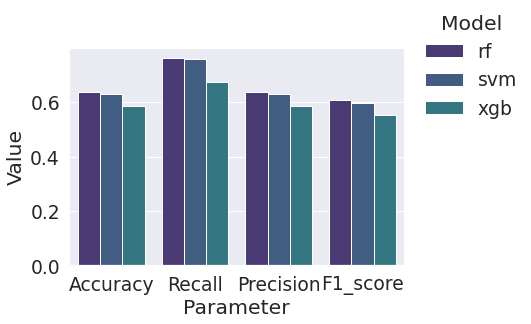

In [34]:
sns.set_context("notebook", font_scale = 1.7)
sns.set_palette("viridis")
a = sns.barplot(data = models_fernando, x = "Parameter", y = "Value", hue = "Model")
sns.move_legend(a, "lower center", bbox_to_anchor=(1.2, 0.6), title="Model", frameon=False)


Por lo general el modelo usado presenta una peor capacidad de predicción en comparación con la base de datos inicial

# TSNE

Una forma de visualizar el conjunto de palabras es usar técnicas de reducción de dimensionalidad. Por lo tanto, usamos TSNE y word2vec. Esta última permite encontrar conjuntos de palabras a través de una red neuronal

In [35]:
from gensim.models import Word2Vec

from sklearn.manifold import TSNE

In [36]:
sentences = [row.split() for row in df2['Texto_tweet']]
sentences[0]

['sopena',
 'lucrado',
 'zaragoza',
 'primer',
 'minuto',
 'avalistas',
 'intereses',
 'préstam']

In [37]:
model = Word2Vec(sentences=sentences, size=100, window=5, min_count=20, workers=4, max_vocab_size=1000)
model

In [38]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], s = 100)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

No handles with labels found to put in legend.


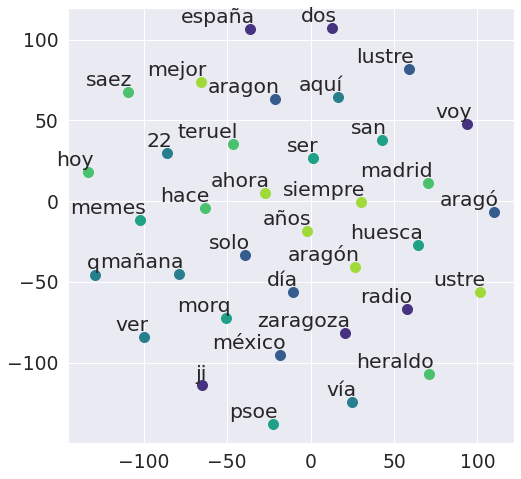

In [39]:
tsne_plot(model)

# Using a trained model

Cargamos el modelo de ML que hemos preparado usando una base de datos ya etiquetada. A continuación usamos los datos de la base de datos sin etiquetar y los predecimos. 
- Es necesario añadir dummy variables para satisfacer el número de columnas del modelo de partída.

In [40]:
import joblib
modelRF = joblib.load("/content/drive/MyDrive/HaPyness/model.pkl")

In [41]:
datosX = datos_X.copy()

In [42]:
features = datosX.shape[1]
to_model = 3091-features

In [43]:
a = 0 # Para introducir dummy variables
while a < to_model:
  datosX[f'col{a}'] = a
  a+=1
datosX.shape

(688, 3091)

In [44]:
ypred = modelRF.predict(datosX)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 00
- 07
- 10h
- 120
- 14
- ...
Feature names seen at fit time, yet now missing:
- 03
- 08
- 08x03
- 1000
- 102
- ...




In [45]:
ml4['valoracion_corpus'] = ypred

In [46]:
ml4

,valoracion_corpus,valoracion_calculada,00,000,02,07,10,100,10h,11,12,120,13,14,15,157,16,17,18,19,1908,1985,1988,19º,1a,20,200,2013,2014,2020,2022,22,25,251god,27,2da,30,300,31,33,...,wow,ws,wtc,xa,xd,xi,xit,xogador,yarza,yendo,you,ypadre,ysq,zagales,zanjáis,zarag,zaragoza,zaragozano,zgz,ziquilink,zl,zo,zonas,zurda,álvarez,ánimo,ánimos,ár,árbitro,área,ástima,élite,éxito,órganos,últimahora,últimas,últimos,única,𝗔𝘇𝘁𝗲𝗰𝗮,𝗨𝗡𝗢
0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319929,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Evaluamos nuestro modelo automático con el predicho con ML. Como se ve tenemos un 53 % de acierto

In [47]:
ml4['valoracion_calculada'].value_counts()

-1.0    364
 1.0    324
Name: valoracion_calculada, dtype: int64

In [48]:
ml4['valoracion_corpus'].value_counts()

-1.0    468
 1.0    220
Name: valoracion_corpus, dtype: int64

In [49]:
final = pd.concat((ml2['Texto_tweet'], 
                   ml4['valoracion_calculada'], 
                   ml4['valoracion_corpus']),
                  axis = 1)
final

,Texto_tweet,valoracion_calculada,valoracion_corpus
0,sopena lucrado zaragoza primer minuto avalista...,1.0,-1.0
1,aragon buenos,1.0,-1.0
2,heraldo convence tampoco mejor mingueza,1.0,1.0
3,aragon buenos días cielo voy feliz día,1.0,-1.0
4,salud mañana cabinas tamizaje covid19 llegarán...,1.0,1.0
...,...,...,...
683,sala conciertos veintiuno lleva activo nueve a...,1.0,1.0
684,acionales pandilleros extorsionaban zaragoza e...,-1.0,1.0
685,personal laboral age conflicto colectivo incum...,-1.0,-1.0
686,zaragoza tan bien peeseoe,1.0,-1.0


Quiero ver las diferencias entre columnas

In [50]:
final['control'] = final['valoracion_calculada']==final['valoracion_corpus']

In [51]:
trues = final['control'].value_counts()[1]
falses = final['control'].value_counts()[0]

Text(1.7, 250, 'Acierto = 53.2 %')

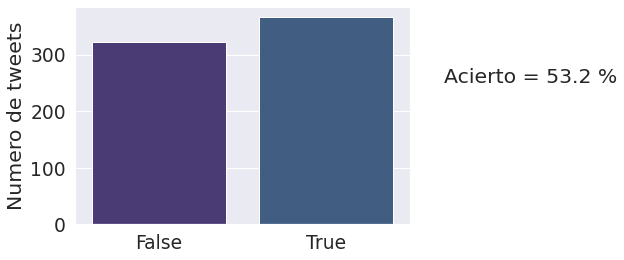

In [52]:
a = sns.countplot(data = final, x = 'control')
a.set(xlabel ='', ylabel='Numero de tweets')
acierto = round((trues/(trues+falses))*100,2)
plt.text(x=1.7, y = 250, s = f'Acierto = {acierto} %' )


Por lo general el modelo de ML predice más tweets con sentimiento negativo que el procesado con el valorador algorítico

[Text(0, 0.5, 'Suma cumulativa \nde sentimiento'), Text(0.5, 0, 'Tweet')]

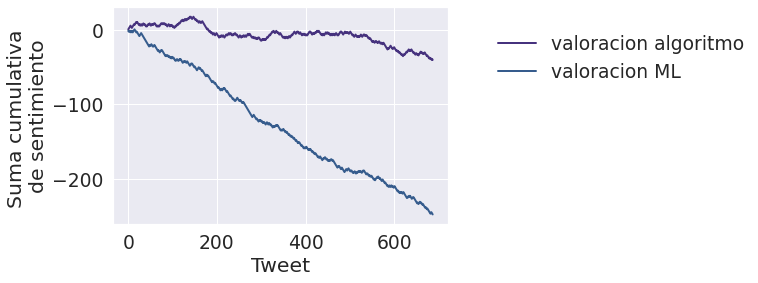

In [53]:
a = final['valoracion_calculada'].cumsum().plot(kind = 'line',lw = 2 ,label = 'valoracion algoritmo')
b = final['valoracion_corpus'].cumsum().plot(kind = 'line', lw = 2,label = 'valoracion ML')
plt.legend(bbox_to_anchor=(1.1, .95))
a.set(xlabel = 'Tweet', ylabel = 'Suma cumulativa \nde sentimiento')